# Hands on ML

5025231229 - Ahmad Zaky Ash Shidqi

Link Dataset : https://www.kaggle.com/datasets/rajyellow46/wine-quality/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
raw = pd.read_csv('winequalityN.csv')

df = raw.sample(n=1000, random_state=42)

df.to_csv('winequality_sampled.csv', index=False)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3103,white,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7
1419,white,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7
4761,white,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6
4690,white,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6
4032,white,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,white,5.8,0.14,0.15,6.1,0.042,27.0,123.0,0.99362,3.06,0.60,9.9,6
5636,red,9.0,0.46,0.23,2.8,0.092,28.0,104.0,0.99830,3.10,0.56,9.2,5
4703,white,5.9,0.12,0.28,1.4,0.037,36.0,83.0,0.99074,3.33,0.42,10.9,7
5023,red,9.0,0.62,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5


In [4]:
df.size

13000

In [5]:
df.shape

(1000, 13)

In [6]:
columns = df.columns
for i, col in enumerate (columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  2
Columns 1 =  79
Columns 2 =  117
Columns 3 =  78
Columns 4 =  197
Columns 5 =  121
Columns 6 =  89
Columns 7 =  231
Columns 8 =  451
Columns 9 =  85
Columns 10 =  73
Columns 11 =  65
Columns 12 =  6


In [7]:
df.info

<bound method DataFrame.info of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
3103  white            7.0              0.25         0.45             2.3   
1419  white            7.6              0.14         0.74             1.6   
4761  white            6.2              0.15         0.27            11.0   
4690  white            6.7              0.16         0.32            12.5   
4032  white            6.8              0.27         0.22            17.8   
...     ...            ...               ...          ...             ...   
3555  white            5.8              0.14         0.15             6.1   
5636    red            9.0              0.46         0.23             2.8   
4703  white            5.9              0.12         0.28             1.4   
5023    red            9.0              0.62         0.04             1.9   
3780  white            6.7              0.42         0.39            12.1   

      chlorides  free sulfur dioxide  total

In [8]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
df.isnull().sum() 

type                    0
fixed acidity           3
volatile acidity        2
citric acid             1
residual sugar          0
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               2
alcohol                 0
quality                 0
dtype: int64

Inisialisasi data yang kosong dengan nilai "0"

In [11]:
df = df.fillna(0)
df.isnull().sum() 

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Konversi jenis bunga menjadi numerik

In [13]:
df['type'] = df['type'].replace({'white': 1, 'red': 2})
print(df['type'])

3103    1
1419    1
4761    1
4690    1
4032    1
       ..
3555    1
5636    2
4703    1
5023    2
3780    1
Name: type, Length: 1000, dtype: int64


C:\Users\lenov\AppData\Local\Temp\ipykernel_46448\2470502459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({'white': 1, 'red': 2})


Visualisasi data

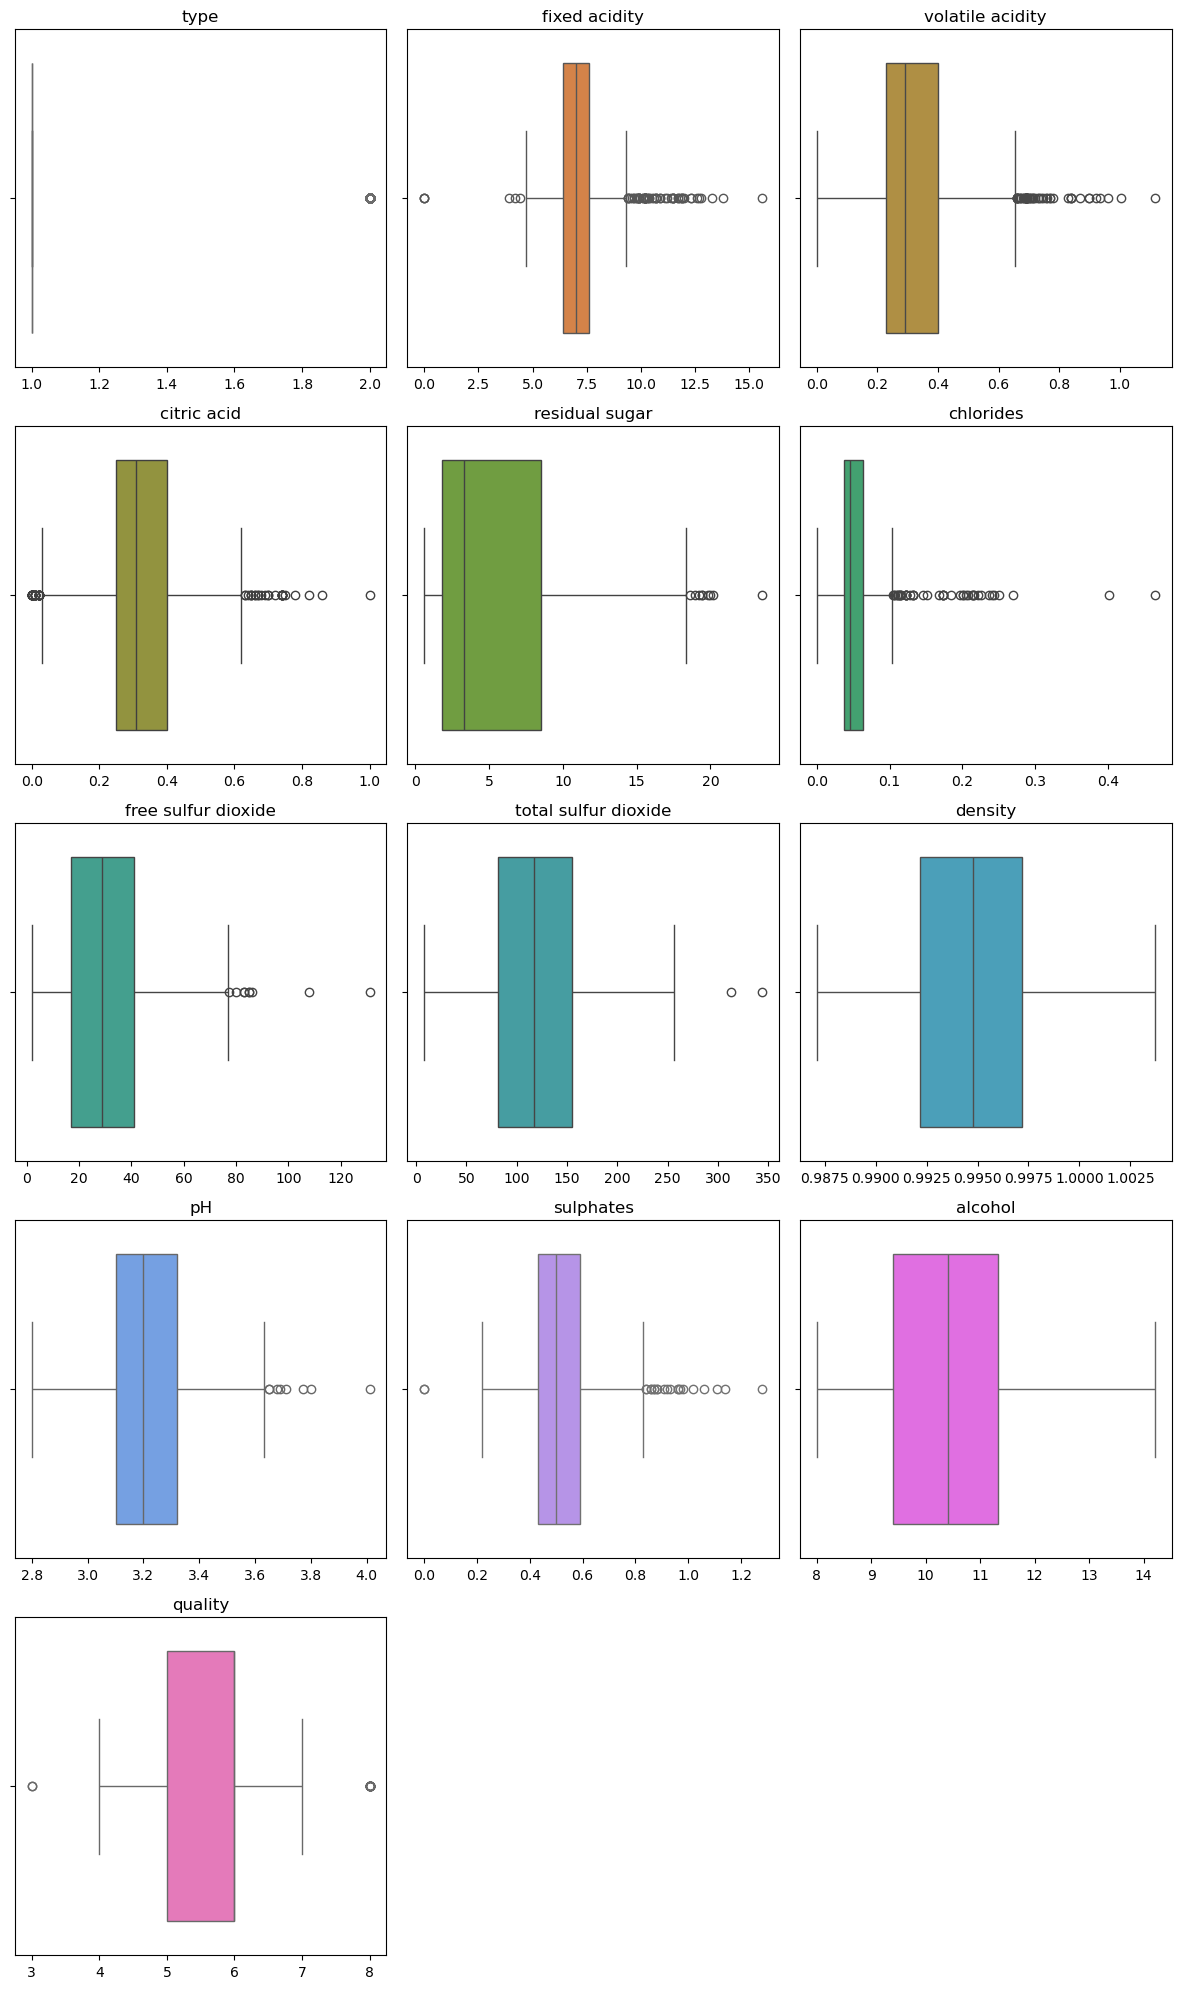

In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_features = len(numeric_columns)

ncols = 3
nrows = (num_features // ncols) + (num_features % ncols > 0)

plt.figure(figsize=(12, 4 * nrows))

colors = sns.color_palette("husl", num_features)

for i, column in enumerate(numeric_columns):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(x=df[column], color=colors[i])
    plt.title(f'{column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

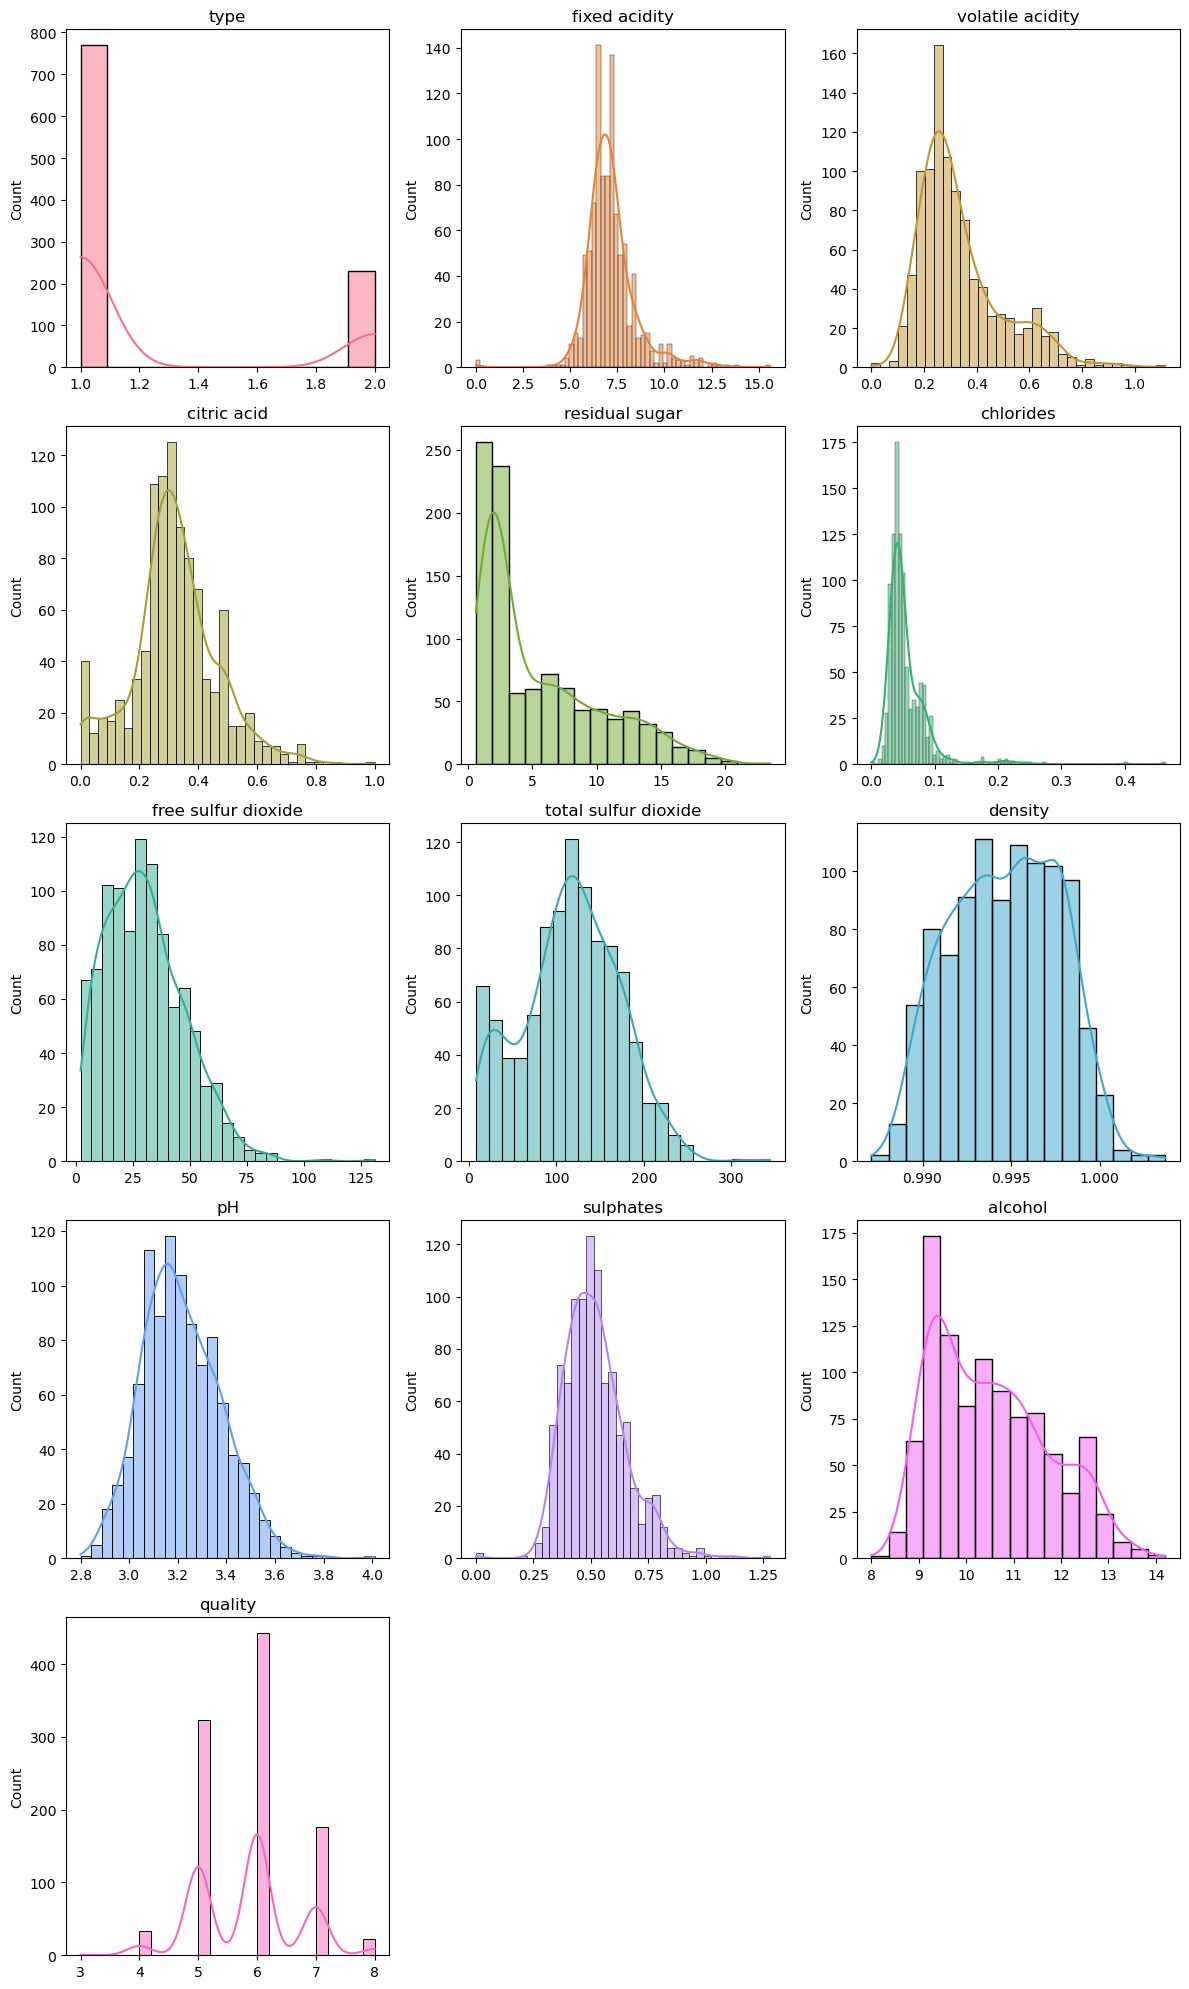

In [16]:
num_features = len(numeric_columns)

ncols = 3
nrows = (num_features // ncols) + (num_features % ncols > 0)

plt.figure(figsize=(12, 4 * nrows))

colors = sns.color_palette("husl", num_features)

for i, column in enumerate(numeric_columns):
    plt.subplot(nrows, ncols, i+1)
    sns.histplot(df[column], kde=True, color=colors[i])
    plt.title(f'{column}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

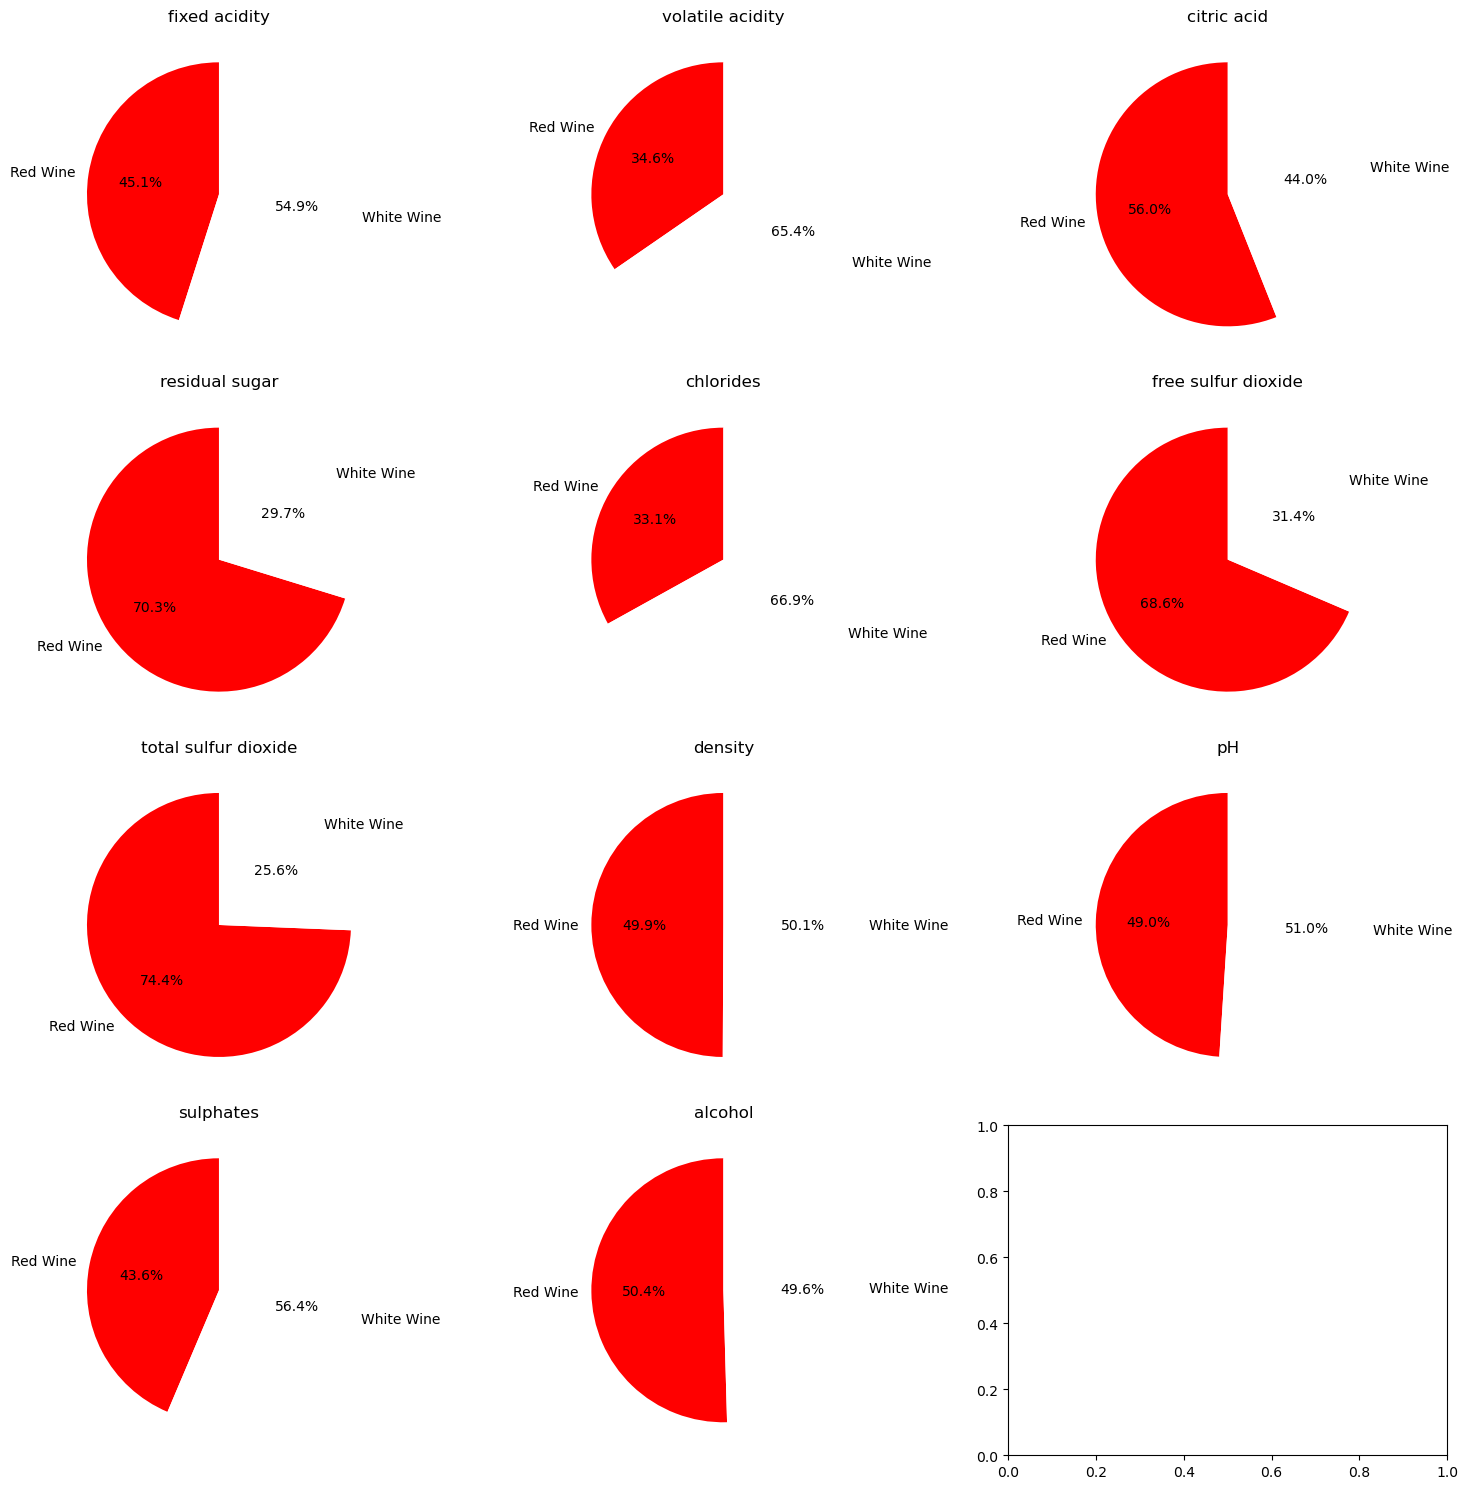

In [17]:
features = [col for col in df.columns if col not in ['type', 'quality']]

# Membuat pie chart untuk setiap fitur
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))  # Layout grid

for ax, feature in zip(axes.flat, features):
    # Menghitung rata-rata fitur berdasarkan tipe wine
    avg_values = df.groupby('type')[feature].mean()
    
    # Labels dan warna pie chart
    labels = ['Red Wine', 'White Wine']
    colors = ['red', 'white']
    
    # Membuat pie chart
    ax.pie(avg_values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature)

plt.tight_layout()
plt.show()

<Axes: >

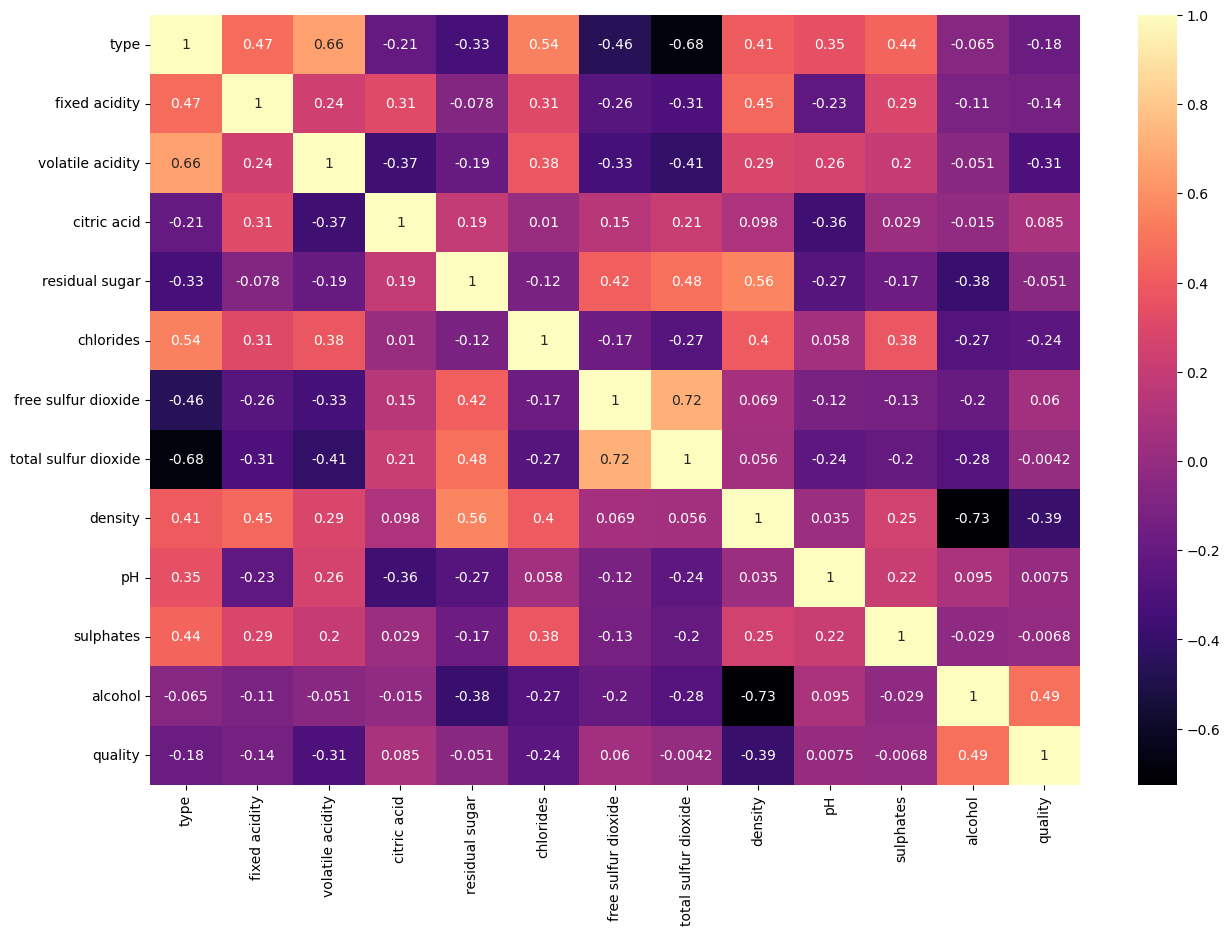

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_columns].corr(), cmap="magma", annot=True)

## ***PCA***

In [20]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=["pc1", "pc2"])

print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.293 0.215


PCA explained variance ratio:
 0.293 0.215


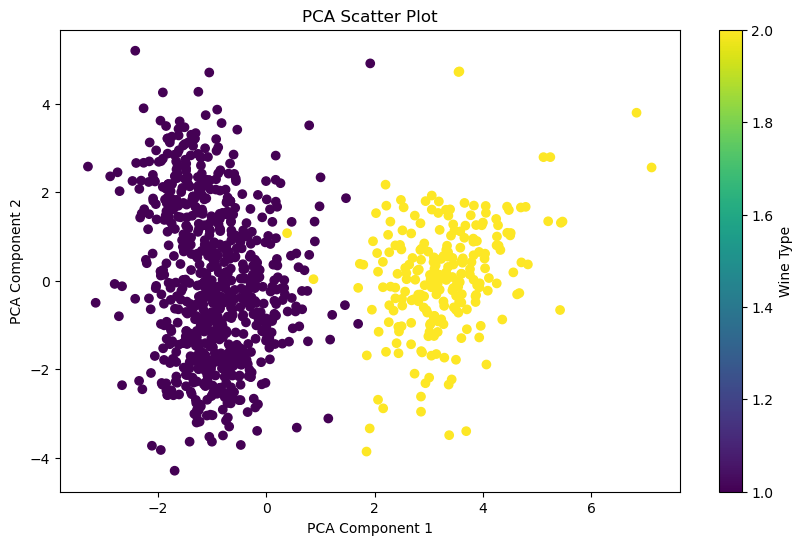

In [21]:
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=df['type'], cmap='viridis')
plt.title('PCA Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Wine Type')
plt.show()

### ***Silhouette Score***

C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

WCSS score for n_clusters = 2 is 3333.456
Silhouette score for n_clusters = 2 is 0.533
WCSS score for n_clusters = 3 is 1598.515
Silhouette score for n_clusters = 3 is 0.530
WCSS score for n_clusters = 4 is 1211.382
Silhouette score for n_clusters = 4 is 0.462
WCSS score for n_clusters = 5 is 995.327
Silhouette score for n_clusters = 5 is 0.414
WCSS score for n_clusters = 6 is 866.447
Silhouette score for n_clusters = 6 is 0.366
WCSS score for n_clusters = 7 is 772.529
Silhouette score for n_clusters = 7 is 0.370


C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


WCSS score for n_clusters = 8 is 683.256
Silhouette score for n_clusters = 8 is 0.372
WCSS score for n_clusters = 9 is 631.157
Silhouette score for n_clusters = 9 is 0.342


C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


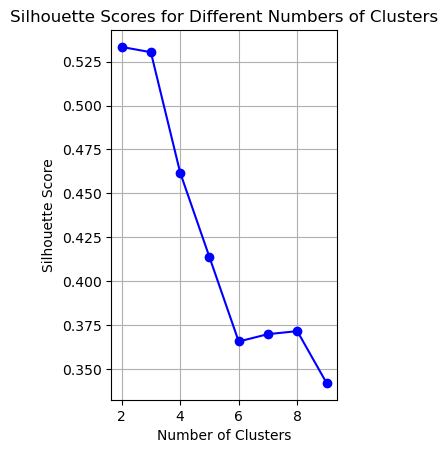

In [23]:
wcss = []
scores = []

for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)
    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print(f'WCSS score for n_clusters = {i} is {km.inertia_:.3f}')
    print(f'Silhouette score for n_clusters = {i} is {silhouette_avg:.3f}')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), scores, marker='o', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

## **K-Means Clustering**

### ***Elbow Method***

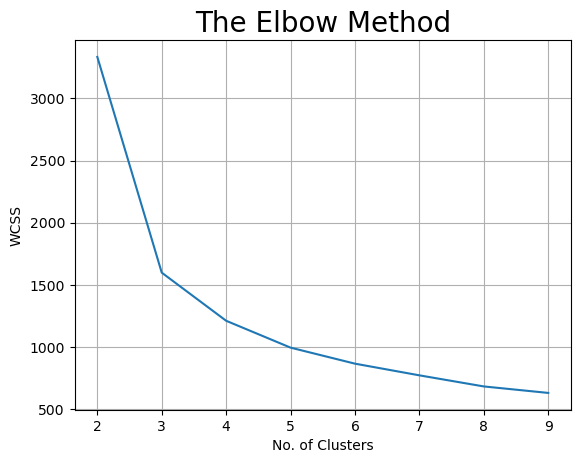

In [26]:
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [27]:
kmeansmodel = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(pca_data)

C:\Users\lenov\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


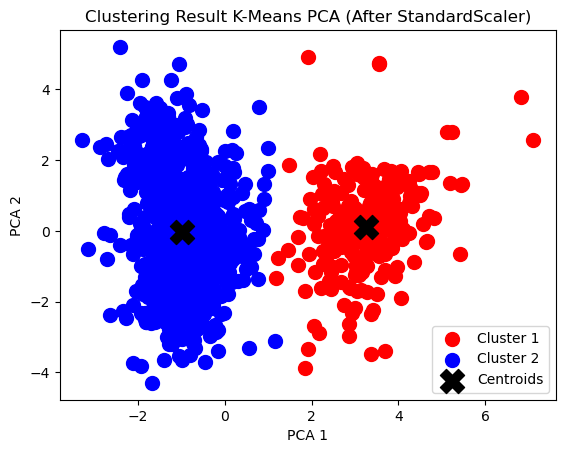

In [28]:
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='X')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## **Hierarchical Clustering (Agglomerative Clustering)**

In [30]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]

for j in range(len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage=linkage_col[j])
        AC.fit(pca_data)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('Silhouette score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
        
    print("\n----------------------------------------------------------\n")
    scores_all[j] = scores


Linkage:  ward
Silhouette score for n_clusters = 2 is 0.5327024648676317
Silhouette score for n_clusters = 3 is 0.506280188279786
Silhouette score for n_clusters = 4 is 0.4165254821063311
Silhouette score for n_clusters = 5 is 0.38984049991519787
Silhouette score for n_clusters = 6 is 0.3456863512127056
Silhouette score for n_clusters = 7 is 0.33294304539697556
Silhouette score for n_clusters = 8 is 0.330451571068672
Silhouette score for n_clusters = 9 is 0.3301570507081046

----------------------------------------------------------

Linkage:  complete
Silhouette score for n_clusters = 2 is 0.28930466415202216
Silhouette score for n_clusters = 3 is 0.19701670710492017
Silhouette score for n_clusters = 4 is 0.40643054626993763
Silhouette score for n_clusters = 5 is 0.3704051948221519
Silhouette score for n_clusters = 6 is 0.3505187148140525
Silhouette score for n_clusters = 7 is 0.3478482265348189
Silhouette score for n_clusters = 8 is 0.3138638466974357
Silhouette score for n_clusters 

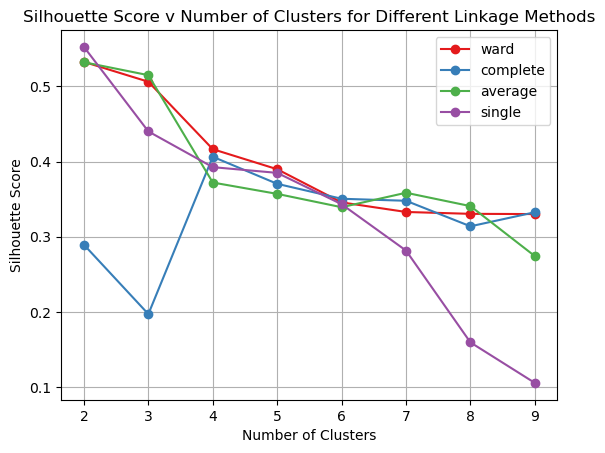

In [31]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score v Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

Karena nilai yang paling besar ada di single link pada Silhouette score for n_clusters = 2 is 0.5526257392273322

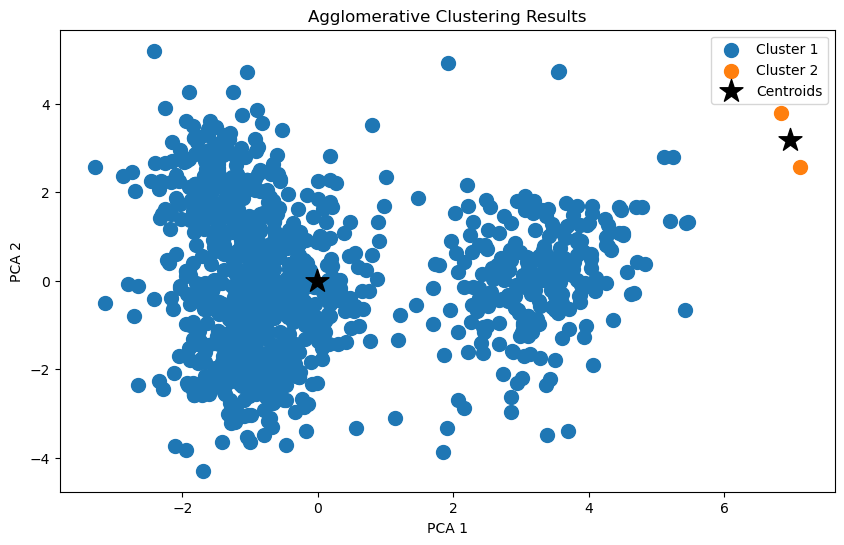

In [33]:
n_clusters = 2

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
y_agg = agg_clustering.fit_predict(pca_data)

plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    plt.scatter(pca_data[y_agg == i, 0], pca_data[y_agg == i, 1], s = 100, label=f'Cluster {i+1}')

centroids = []
for i in range(n_clusters):
    centroids.append([pca_data[y_agg == i, 0].mean(), pca_data[y_agg == i, 1].mean()])

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='*', label='Centroids')

plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()

plt.show()

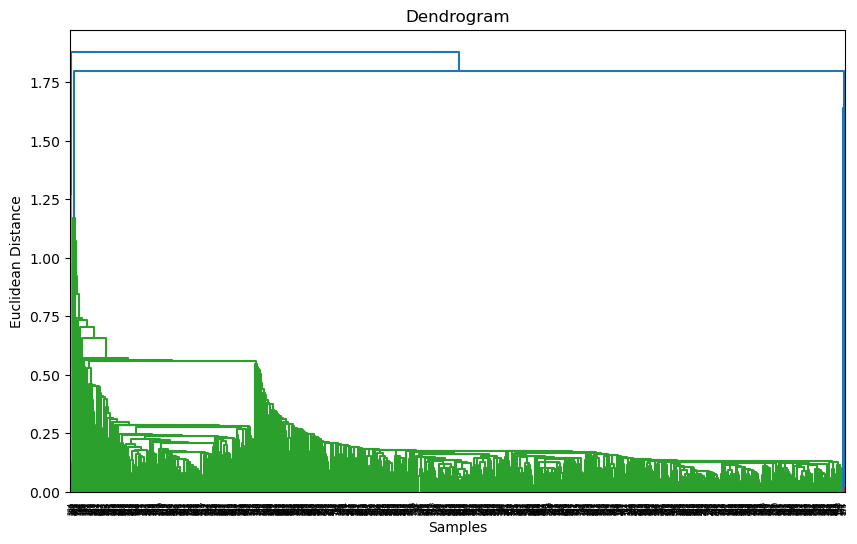

In [34]:
plt.figure(figsize=(10, 6))

dendrogram = sch.dendrogram(sch.linkage(pca_data, method='single'))

plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')

plt.show()

## **DBSCAN**

In [35]:
epsilon = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]
min_samples = [10, 15, 20, 25]

sil_avg = []
max_value = (0, 0, 0, -1)

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(pca_data)

        unique_labels = set(db.labels_)
        if len(unique_labels) >= 2:
            core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
            core_samples_mask[db.core_sample_indices_] = True
            labels = db.labels_

            n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)

            silhouette_avg = silhouette_score(pca_data, labels)
            sil_avg.append(silhouette_avg)

            if silhouette_avg > max_value[3]:
                max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])

epsilon = 2 
min_samples = 25 
number of clusters = 1 
average silhouette score = 0.5151


In [66]:
db=DBSCAN(eps=2, min_samples=25, metric='euclidean')
db.fit(pca_data)

DBSCAN(eps=2, min_samples=25)

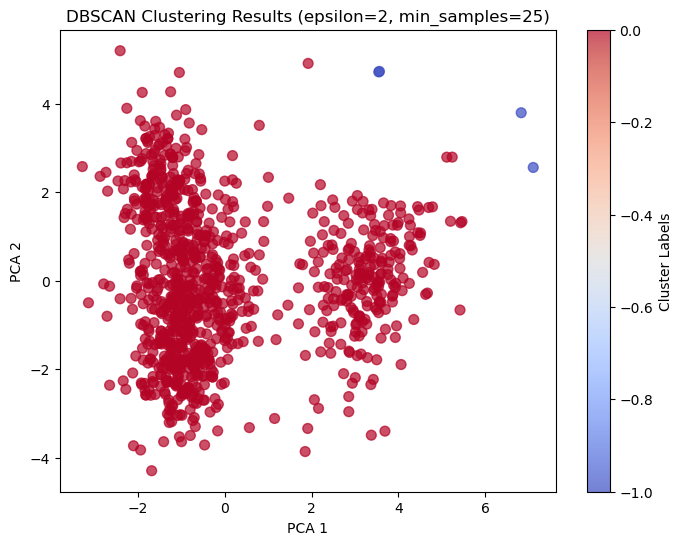

In [68]:
best_epsilon = max_value[0]
best_min_samples = max_value[1]
best_labels = db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='coolwarm', s=50, alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DBSCAN Clustering Results (epsilon={}, min_samples={})'.format(best_epsilon, best_min_samples))

plt.colorbar(label='Cluster Labels')
plt.show()